Mini Project 01 [Ohid Reza 2212087642 | Group T]

In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("data.csv")
print(data.head())

  p_id  accuracy  avg_reac_time
0  p01      97.9            188
1  p02      89.8            365
2  p03      98.9            205
3  p04      98.1            174
4  p05      97.8            134


Data Visualization

         accuracy  avg_reac_time
count   30.000000      30.000000
mean    95.093333     269.666667
std      4.289838     158.005092
min     85.600000      95.000000
25%     92.075000     152.750000
50%     97.000000     203.000000
75%     98.075000     365.000000
max    100.000000     623.000000


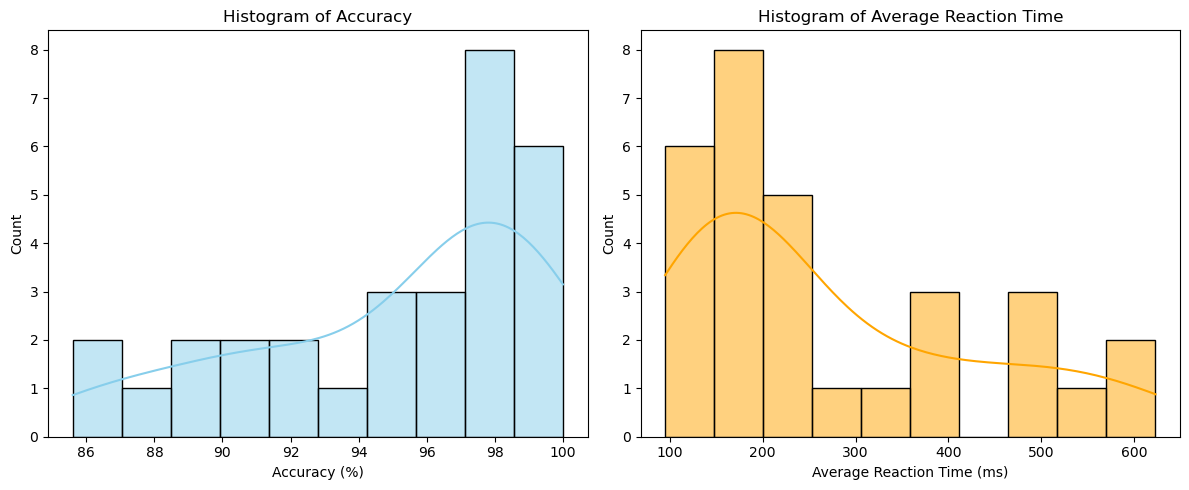

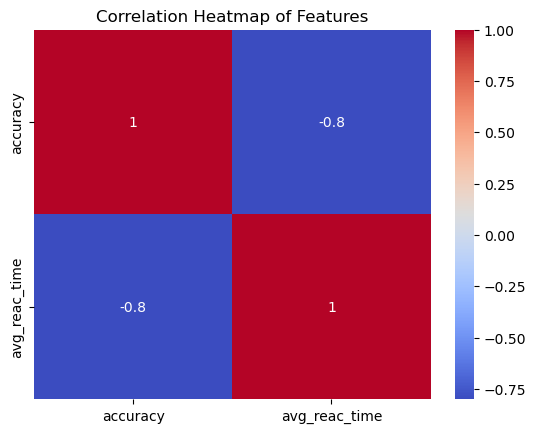

In [ ]:
#summary
print(data.describe())

#histograms of accuracy and avg reac time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['accuracy'], bins=10, kde=True, color='skyblue')
plt.title("Histogram of Accuracy")
plt.xlabel("Accuracy (%)")

plt.subplot(1, 2, 2)
sns.histplot(data['avg_reac_time'], bins=10, kde=True, color='orange')
plt.title("Histogram of Average Reaction Time")
plt.xlabel("Average Reaction Time (ms)")

plt.tight_layout()
plt.savefig("dv_histo.png")
plt.show()

#features correlation heatmap
sns.heatmap(data[['accuracy', 'avg_reac_time']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.savefig("dv_heatmap.png")
plt.show()

KMeans Clustering

In [14]:
#feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['accuracy', 'avg_reac_time']])

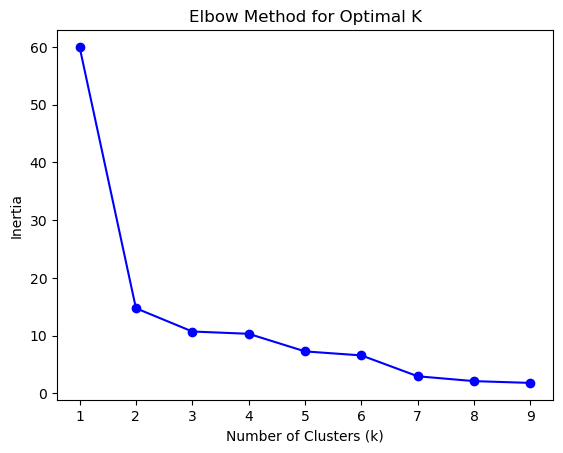

In [ ]:
#elbow method for optimal k
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.savefig("kmeans_elbow.png")
plt.show()

In [16]:
#clustering (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster_label'] = kmeans.fit_predict(scaled_features)

print("Data with cluster labels:")
print(data.head())

Data with cluster labels:
  p_id  accuracy  avg_reac_time  cluster_label
0  p01      97.9            188              0
1  p02      89.8            365              1
2  p03      98.9            205              0
3  p04      98.1            174              0
4  p05      97.8            134              0


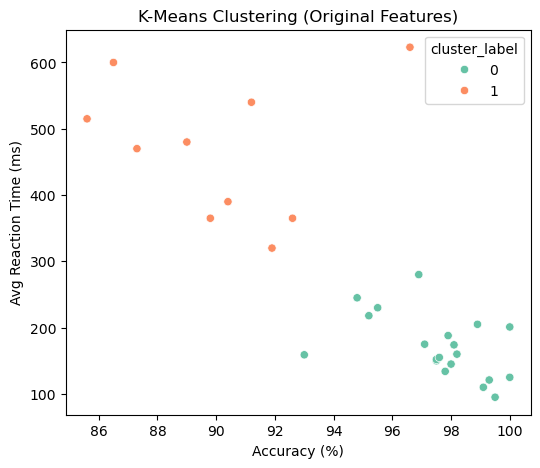

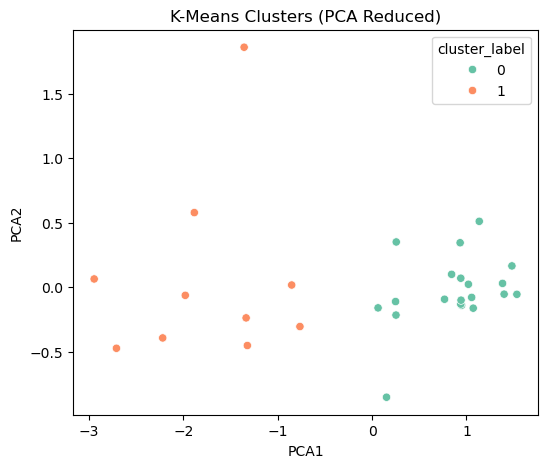

In [19]:
#original feature
plt.figure(figsize=(6, 5))
sns.scatterplot(data=data, x='accuracy', y='avg_reac_time', hue='cluster_label', palette='Set2')
plt.title('K-Means Clustering (Original Features)')
plt.xlabel('Accuracy (%)')
plt.ylabel('Avg Reaction Time (ms)')
plt.savefig('kmeans_original.png')
plt.show()

#reduced feature with PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_features)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=data['cluster_label'], palette='Set2')
plt.title("K-Means Clusters (PCA Reduced)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.savefig('kmeans_pcaReduced.png')
plt.show()

Train Test Split

In [21]:
X = data[['accuracy', 'avg_reac_time']]
y = data['cluster_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

SVM

In [24]:
param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}

grid_svm = GridSearchCV(SVC(), param_svm, cv=3)
grid_svm.fit(X_train, y_train)

print("Best SVM parameters:", grid_svm.best_params_)

y_pred_svm = grid_svm.predict(X_test)

Best SVM parameters: {'C': 0.1, 'kernel': 'linear'}


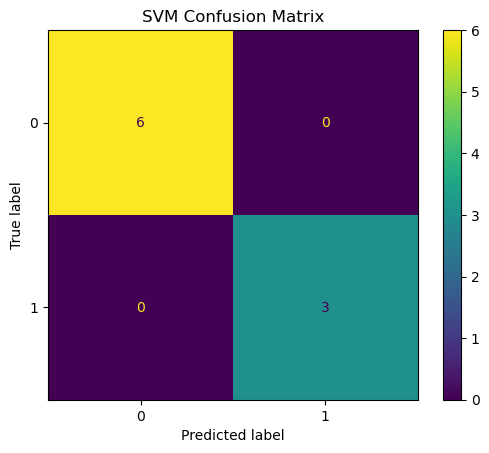

In [23]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(cm_svm).plot()
plt.title('SVM Confusion Matrix')
plt.savefig('svm_confusion_matrix.png')
plt.show()

In [25]:
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



Decision Tree

In [26]:
param_dt = {
    'max_depth': [None, 3, 5],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_dt, cv=3)
grid_dt.fit(X_train, y_train)

print("Best Decision Tree parameters:", grid_dt.best_params_)

y_pred_dt = grid_dt.predict(X_test)

Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': 3}


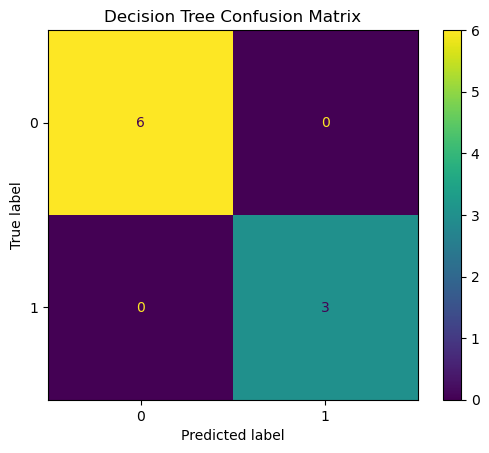

In [27]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt).plot()
plt.title('Decision Tree Confusion Matrix')
plt.savefig('dt_confusion_matrix.png')
plt.show()

In [28]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



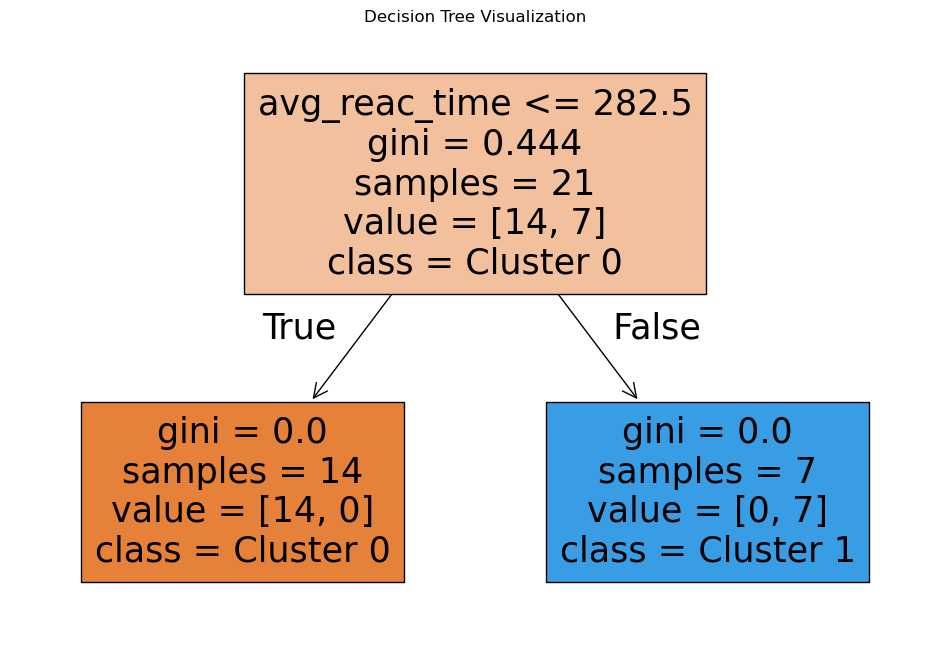

In [29]:
plt.figure(figsize=(12, 8))
plot_tree(grid_dt.best_estimator_, filled=True,
          feature_names=['accuracy', 'avg_reac_time'],
          class_names=['Cluster 0', 'Cluster 1'])
plt.title("Decision Tree Visualization")
plt.savefig("dt_visualization.png")
plt.show()